## Carga de Datos y Limpieza

In [44]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr

In [45]:
data_Stats=pd.read_csv('data/100_Batches_IndPenSim_Statistics.csv',index_col=0)
data=pd.read_csv('data/100_Batches_IndPenSim_V3.csv',usecols=range(39))

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113935 entries, 0 to 113934
Data columns (total 39 columns):
 #   Column                                                              Non-Null Count   Dtype  
---  ------                                                              --------------   -----  
 0   Time (h)                                                            113935 non-null  float64
 1   Aeration rate(Fg:L/h)                                               113935 non-null  int64  
 2   Agitator RPM(RPM:RPM)                                               113935 non-null  int64  
 3   Sugar feed rate(Fs:L/h)                                             113935 non-null  int64  
 4   Acid flow rate(Fa:L/h)                                              113935 non-null  float64
 5   Base flow rate(Fb:L/h)                                              113935 non-null  float64
 6   Heating/cooling water flow rate(Fc:L/h)                             113935 non-null  float64
 7   He

In [61]:
data['Viscosity(Viscosity_offline:centPoise)'][0:10]

0      NaN
1      NaN
2      NaN
3      NaN
4    4.083
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
Name: Viscosity(Viscosity_offline:centPoise), dtype: float64

In [48]:
data.describe()

Time (h)  Aeration rate(Fg:L/h)  Agitator RPM(RPM:RPM)  \
count  113935.000000          113935.000000               113935.0   
mean      114.750656              65.246360                  100.0   
std        66.990504              11.690215                    0.0   
min         0.200000              20.000000                  100.0   
25%        57.000000              60.000000                  100.0   
50%       114.000000              65.000000                  100.0   
75%       171.000000              75.000000                  100.0   
max       290.000000              75.000000                  100.0   

       Sugar feed rate(Fs:L/h)  Acid flow rate(Fa:L/h)  \
count            113935.000000           113935.000000   
mean                 76.663764                0.073209   
std                  25.680134                0.552788   
min                   2.000000                0.000000   
25%                  72.000000                0.000000   
50%                  80.000000                0.000000   
75%                  90.000000                0.000000   
max                 150.000000               12.996000   

       Base flow rate(Fb:L/h)  Heating/cooling water flow rate(Fc:L/h)  \
count           113935.000000                            113935.000000   
mean                61.334389                                74.346341   
std                 44.972713                               108.022600   
min                  0.000000                                 0.000100   
25%                 35.766000                                11.157000   
50%                 55.407000                                34.384000   
75%                 76.271500                                94.904500   
max                225.000000                              1500.000000   

       Heating water flow rate(Fh:L/h)  Water for injection/dilution(Fw:L/h)  \
count                    113935.000000                         113935.000000   
mean                         20.763025                            154.811954   
std                          50.230266                            155.601474   
min                           0.000100                              0.000000   
25%                           0.000100                              0.000000   
50%                           0.159010                            100.000000   
75%                          11.640500                            250.000000   
max                        1500.000000                            500.000000   

       Air head pressure(pressure:bar)  Dumped broth flow(Fremoved:L/h)  \
count                    113935.000000                    113935.000000   
mean                          0.945026                      -214.508272   
std                           0.134269                       901.125084   
min                           0.600000                     -4000.000000   
25%                           0.900000                         0.000000   
50%                           0.900000                         0.000000   
75%                           1.100000                         0.000000   
max                           1.100000                         0.000000   

       Substrate concentration(S:g/L)  \
count                   113935.000000   
mean                         4.079817   
std                         13.303517   
min                          0.000006   
25%                          0.001025   
50%                          0.001644   
75%                          0.003003   
max                        115.270000   

       Dissolved oxygen concentration(DO2:mg/L)  \
count                             113935.000000   
mean                                  12.569647   
std                                    1.498680   
min                                    1.000000   
25%                                   11.639000   
50%                                   12.636000   
75%                                   13.614000   
max             

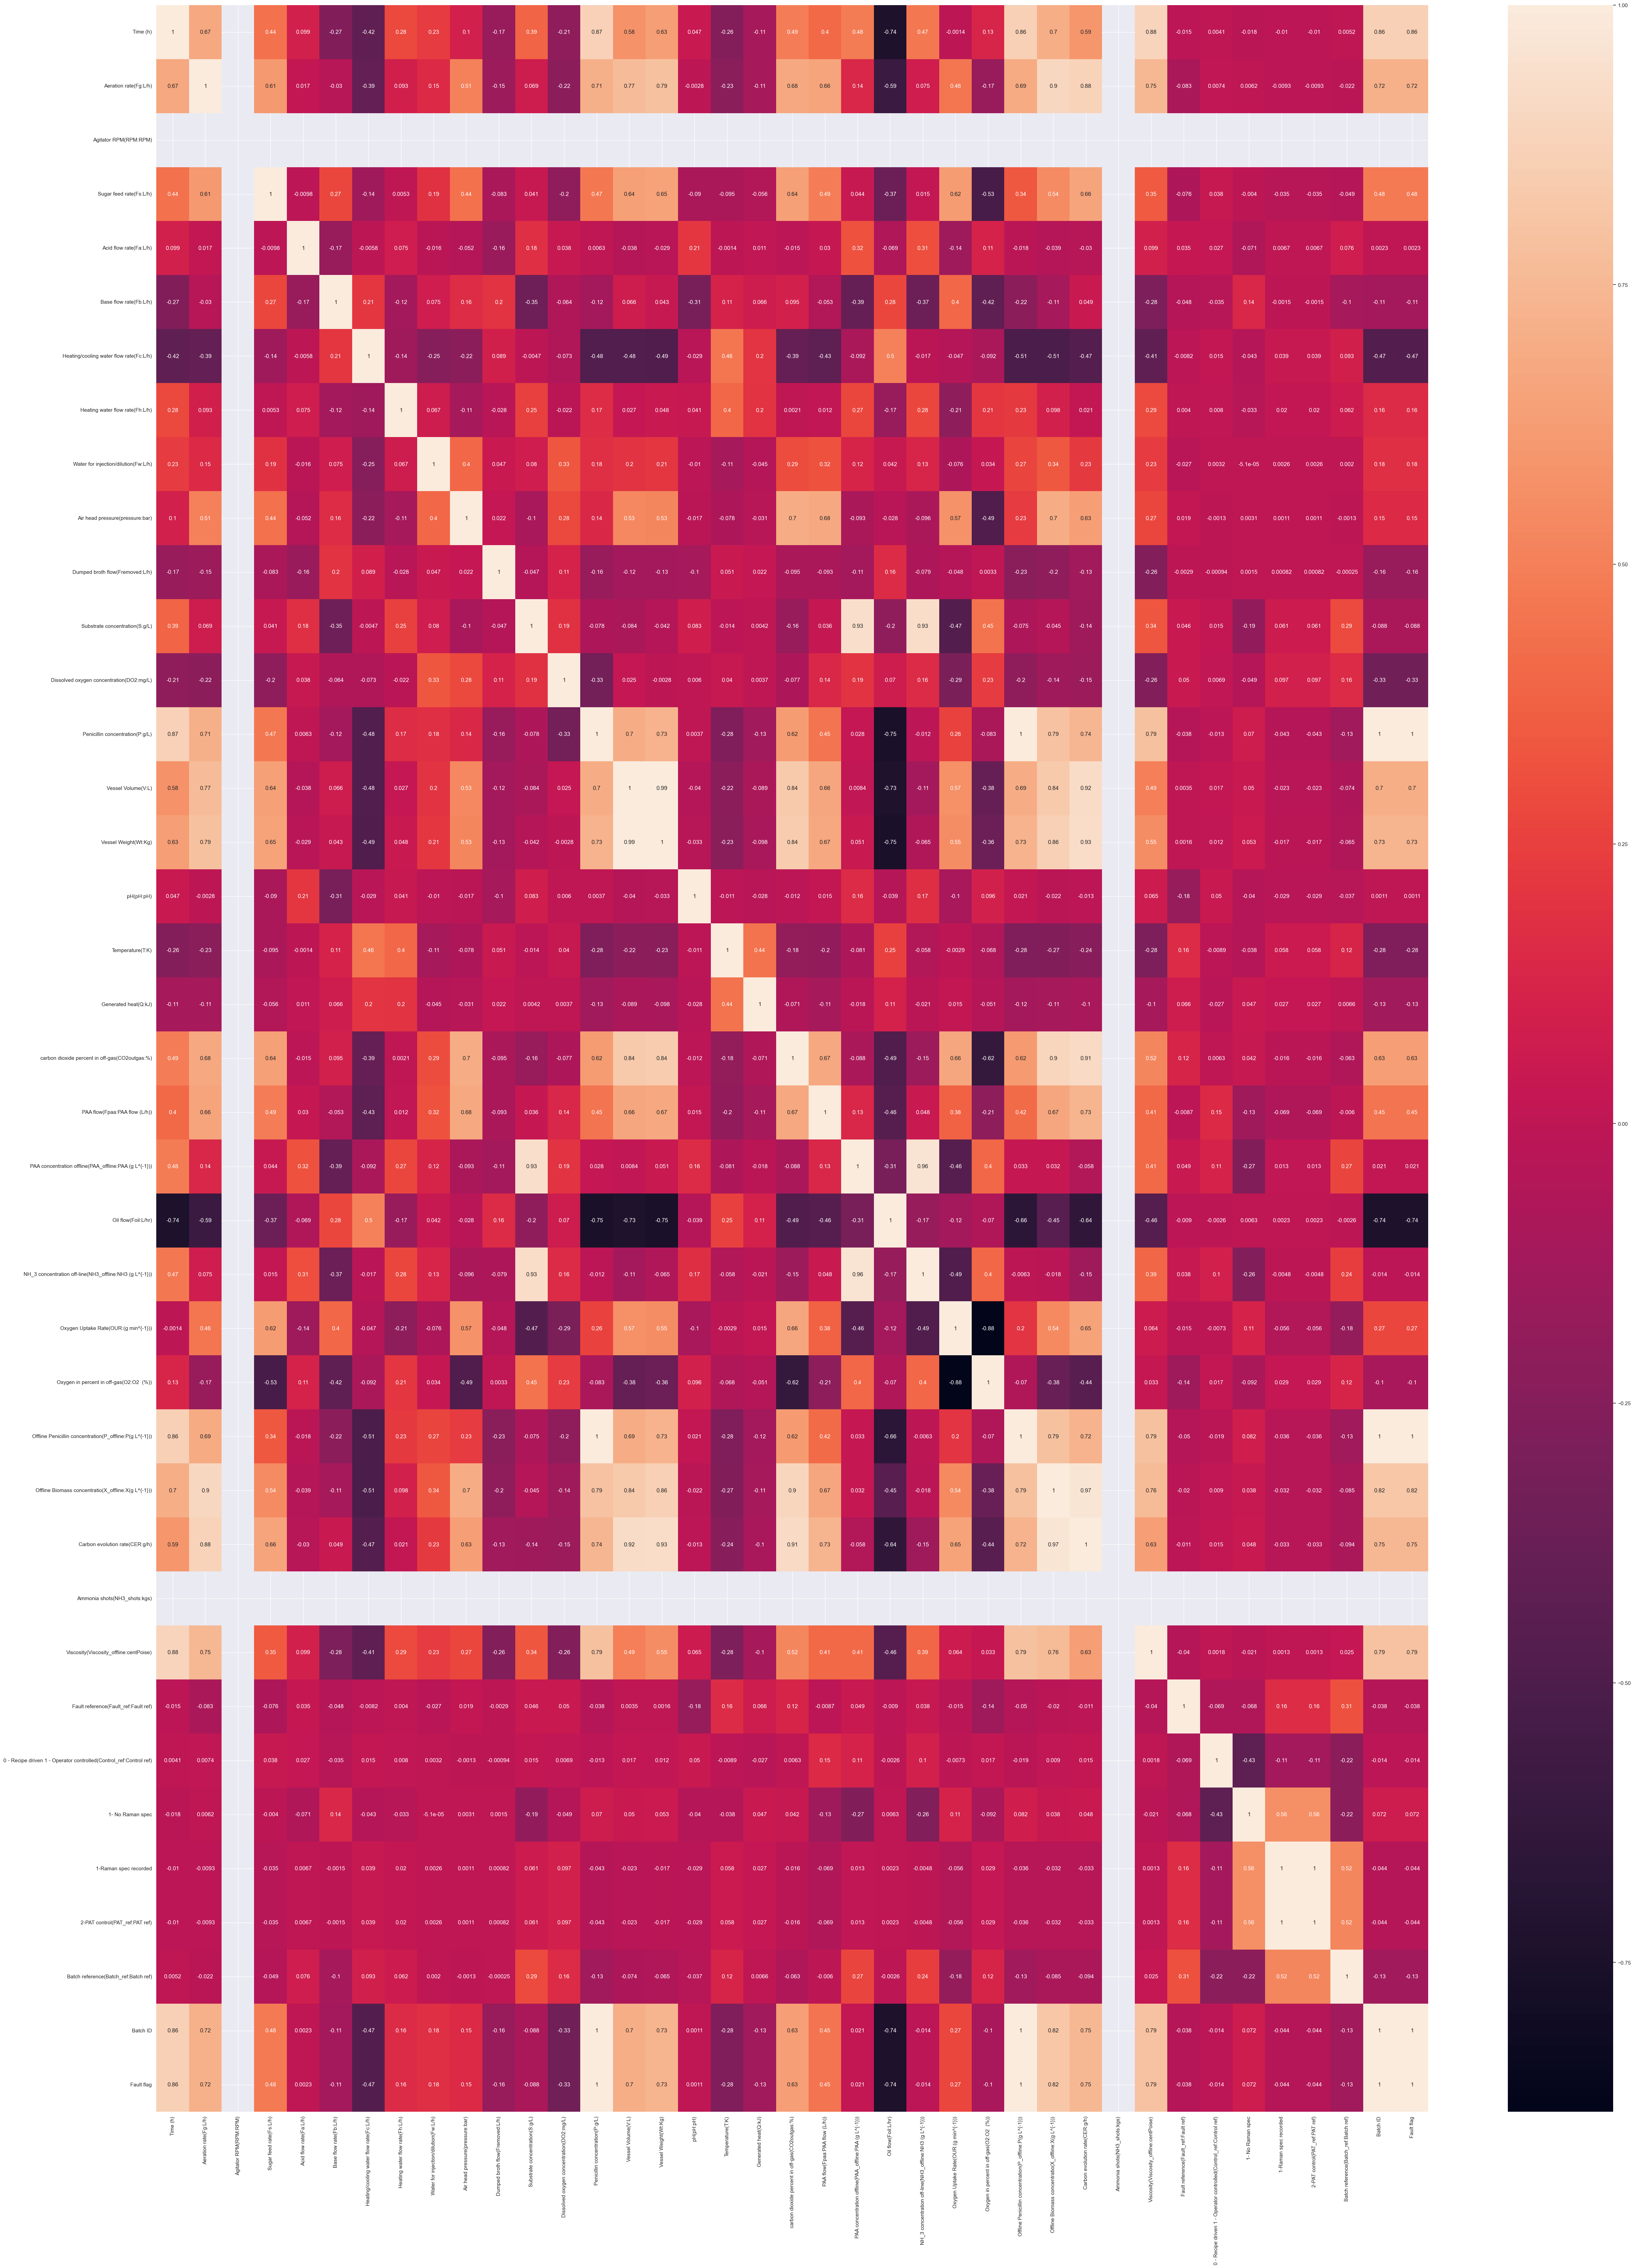

In [49]:
sns.set_theme(rc={'figure.figsize':(60,80)})
sns.heatmap(data.iloc[:,:].corr(), annot=True)
plt.show()

In [50]:
data['Ammonia shots(NH3_shots:kgs)']

0         0
1         0
2         0
3         0
4         0
         ..
113930    0
113931    0
113932    0
113933    0
113934    0
Name: Ammonia shots(NH3_shots:kgs), Length: 113935, dtype: int64

In [51]:
data['Agitator RPM(RPM:RPM)']

0         100
1         100
2         100
3         100
4         100
         ... 
113930    100
113931    100
113932    100
113933    100
113934    100
Name: Agitator RPM(RPM:RPM), Length: 113935, dtype: int64

In [52]:
data = data.drop(columns=['Ammonia shots(NH3_shots:kgs)', 'Agitator RPM(RPM:RPM)'])

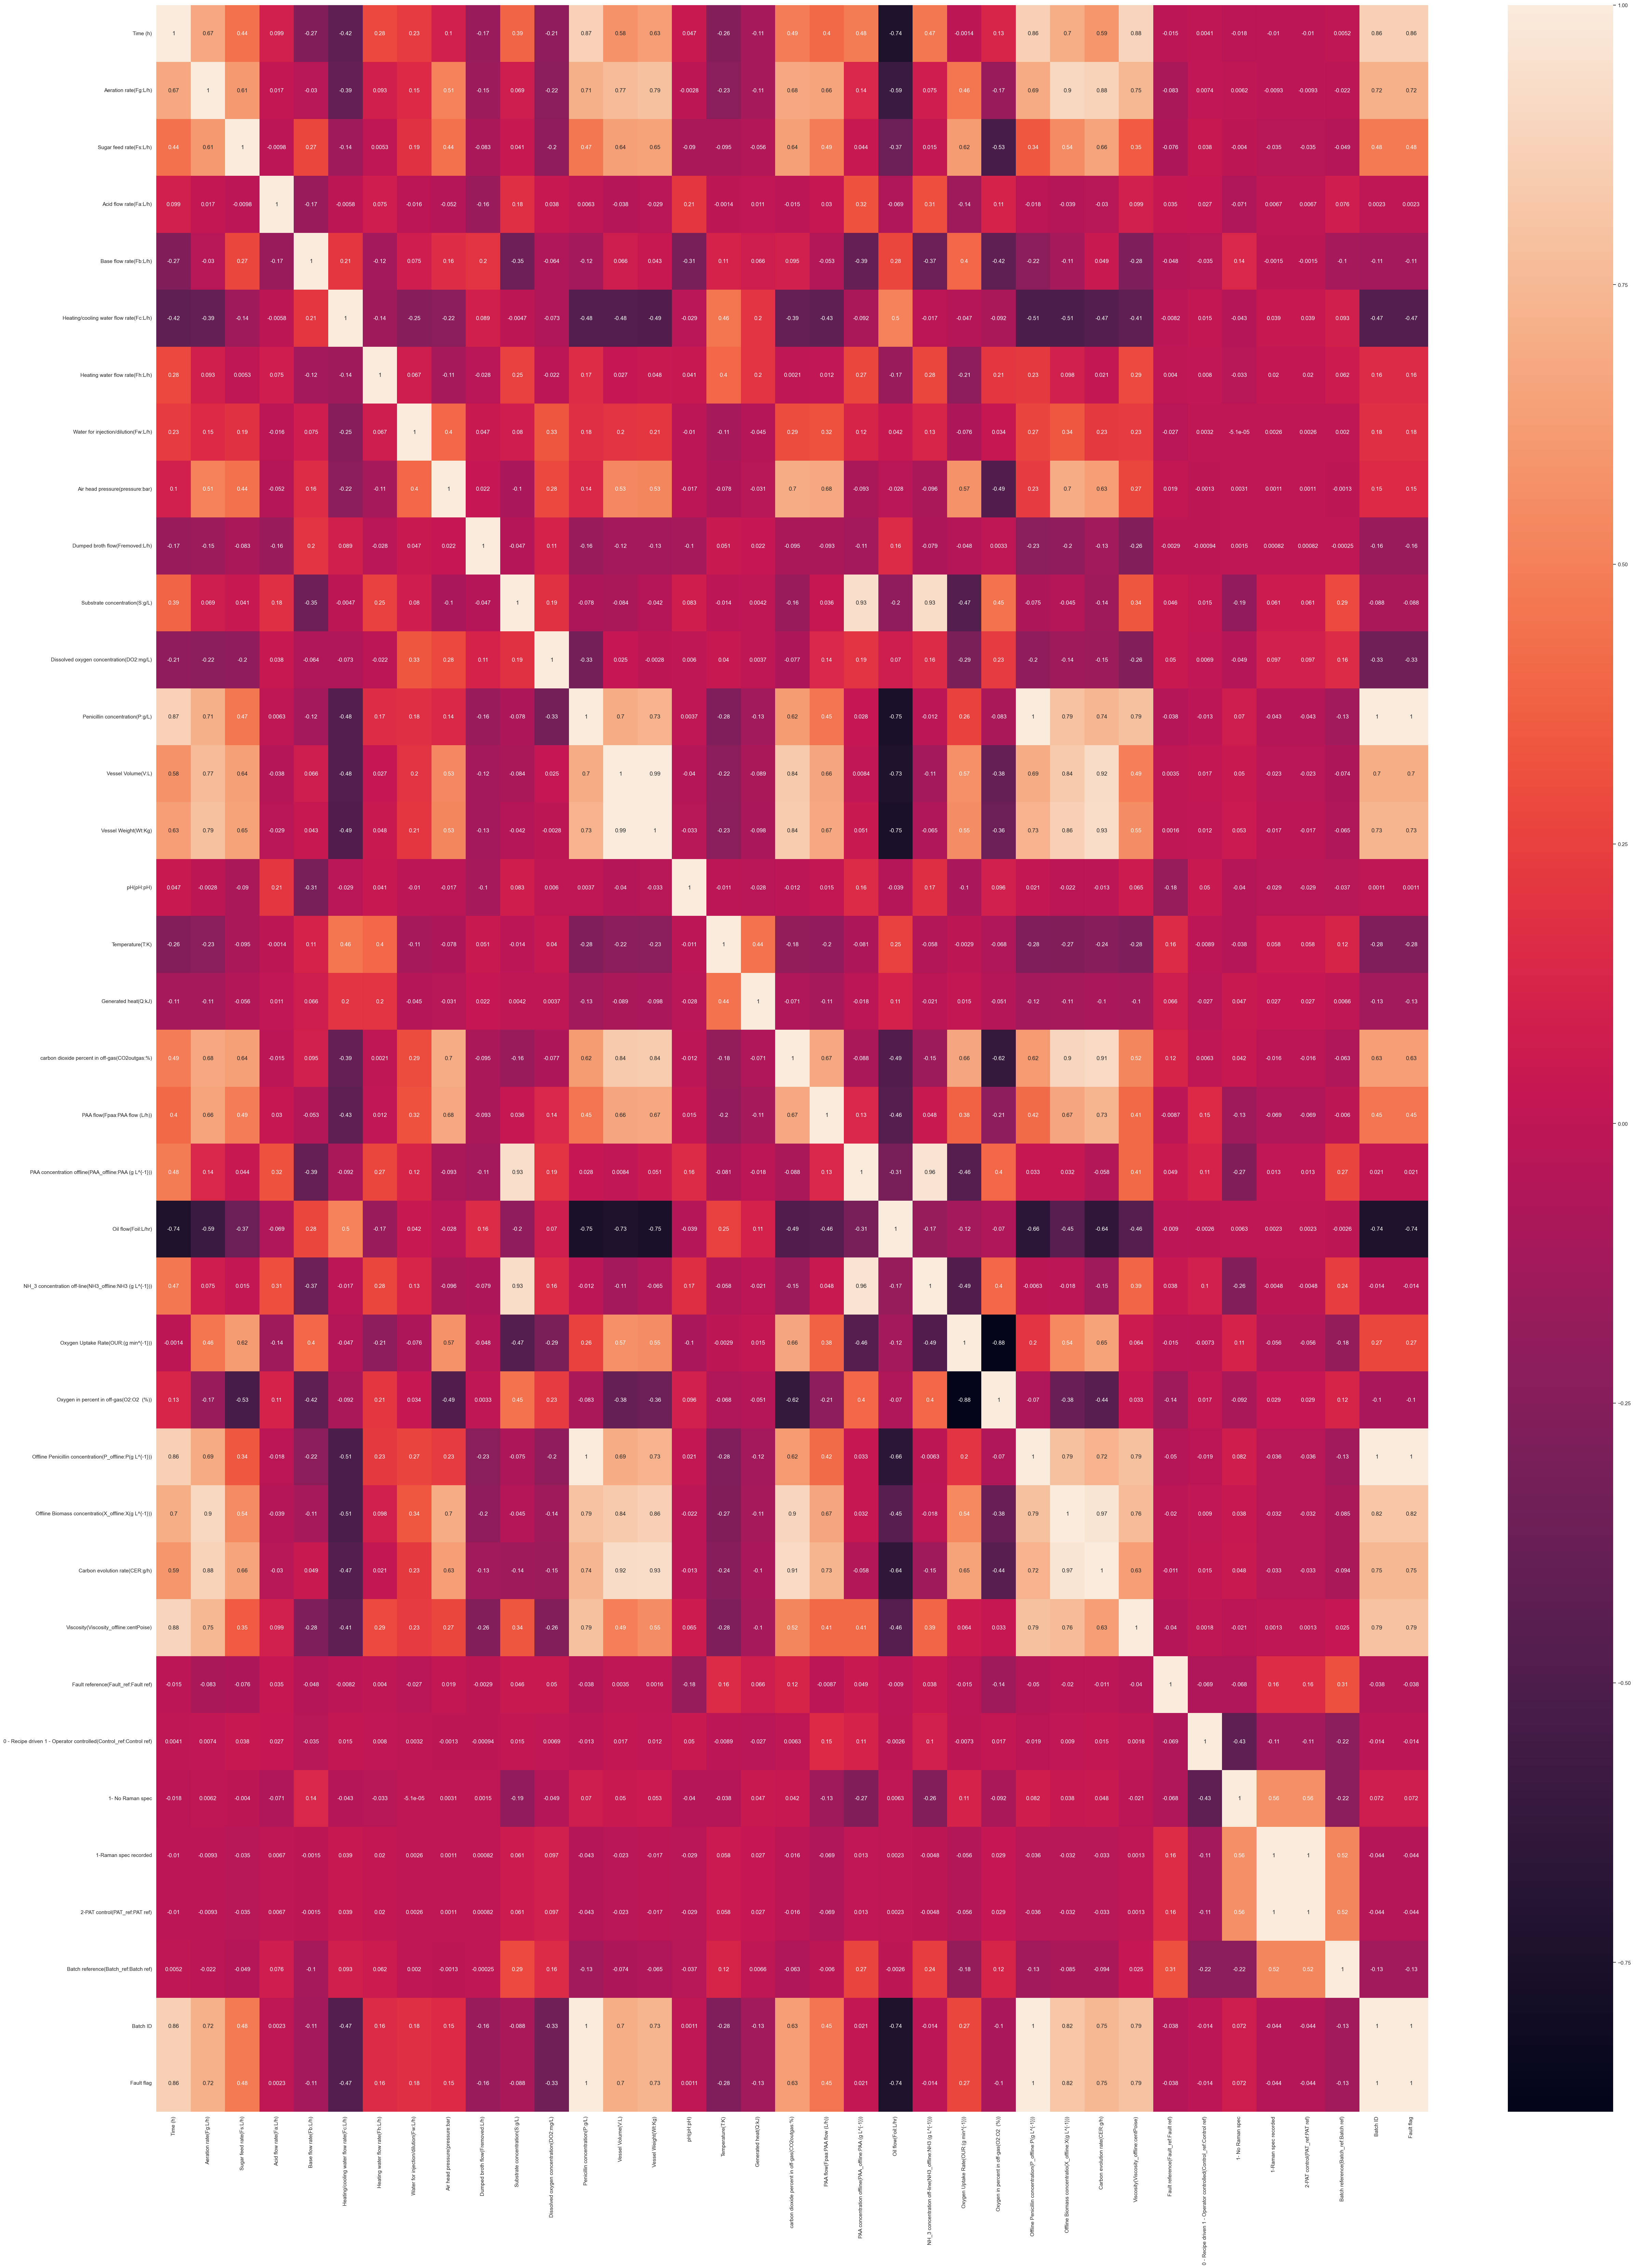

In [53]:
sns.set_theme(rc={'figure.figsize':(60,80)})
sns.heatmap(data.iloc[:,:].corr(), annot=True)
plt.show()

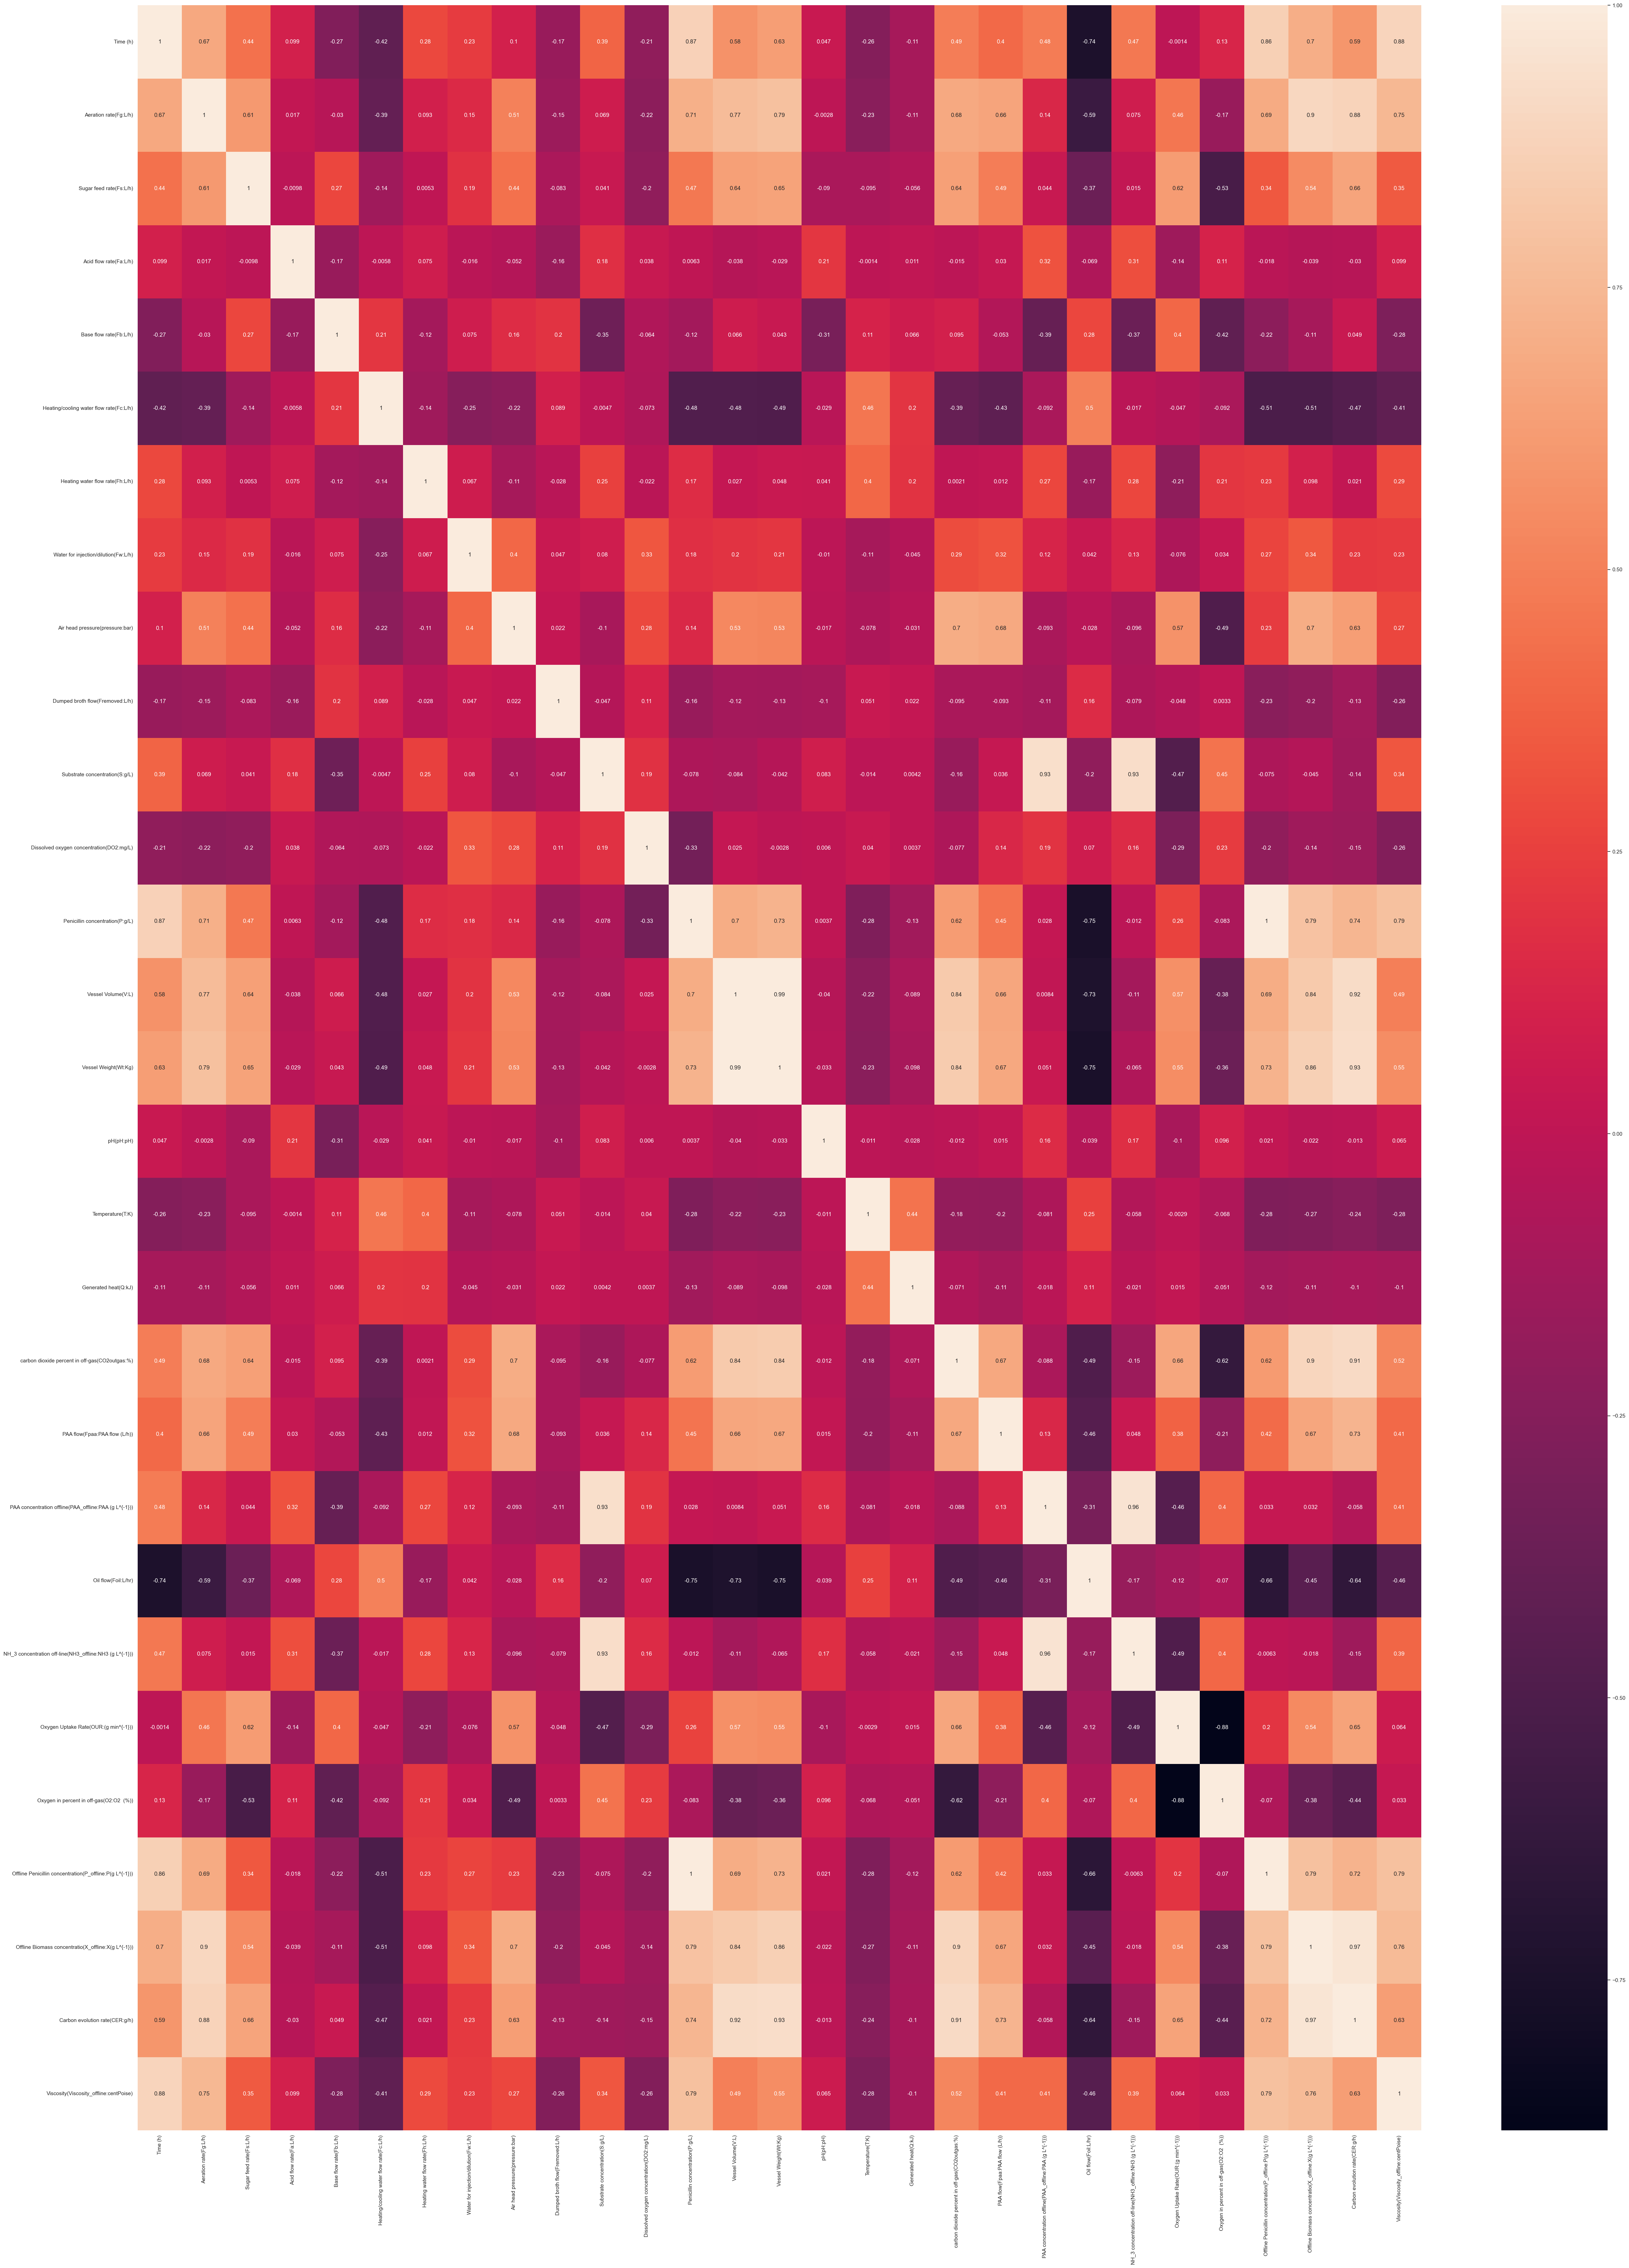

In [54]:
sns.set_theme(rc={'figure.figsize':(60,80)})
sns.heatmap(data.iloc[:,:-8].corr(), annot=True)
plt.show()

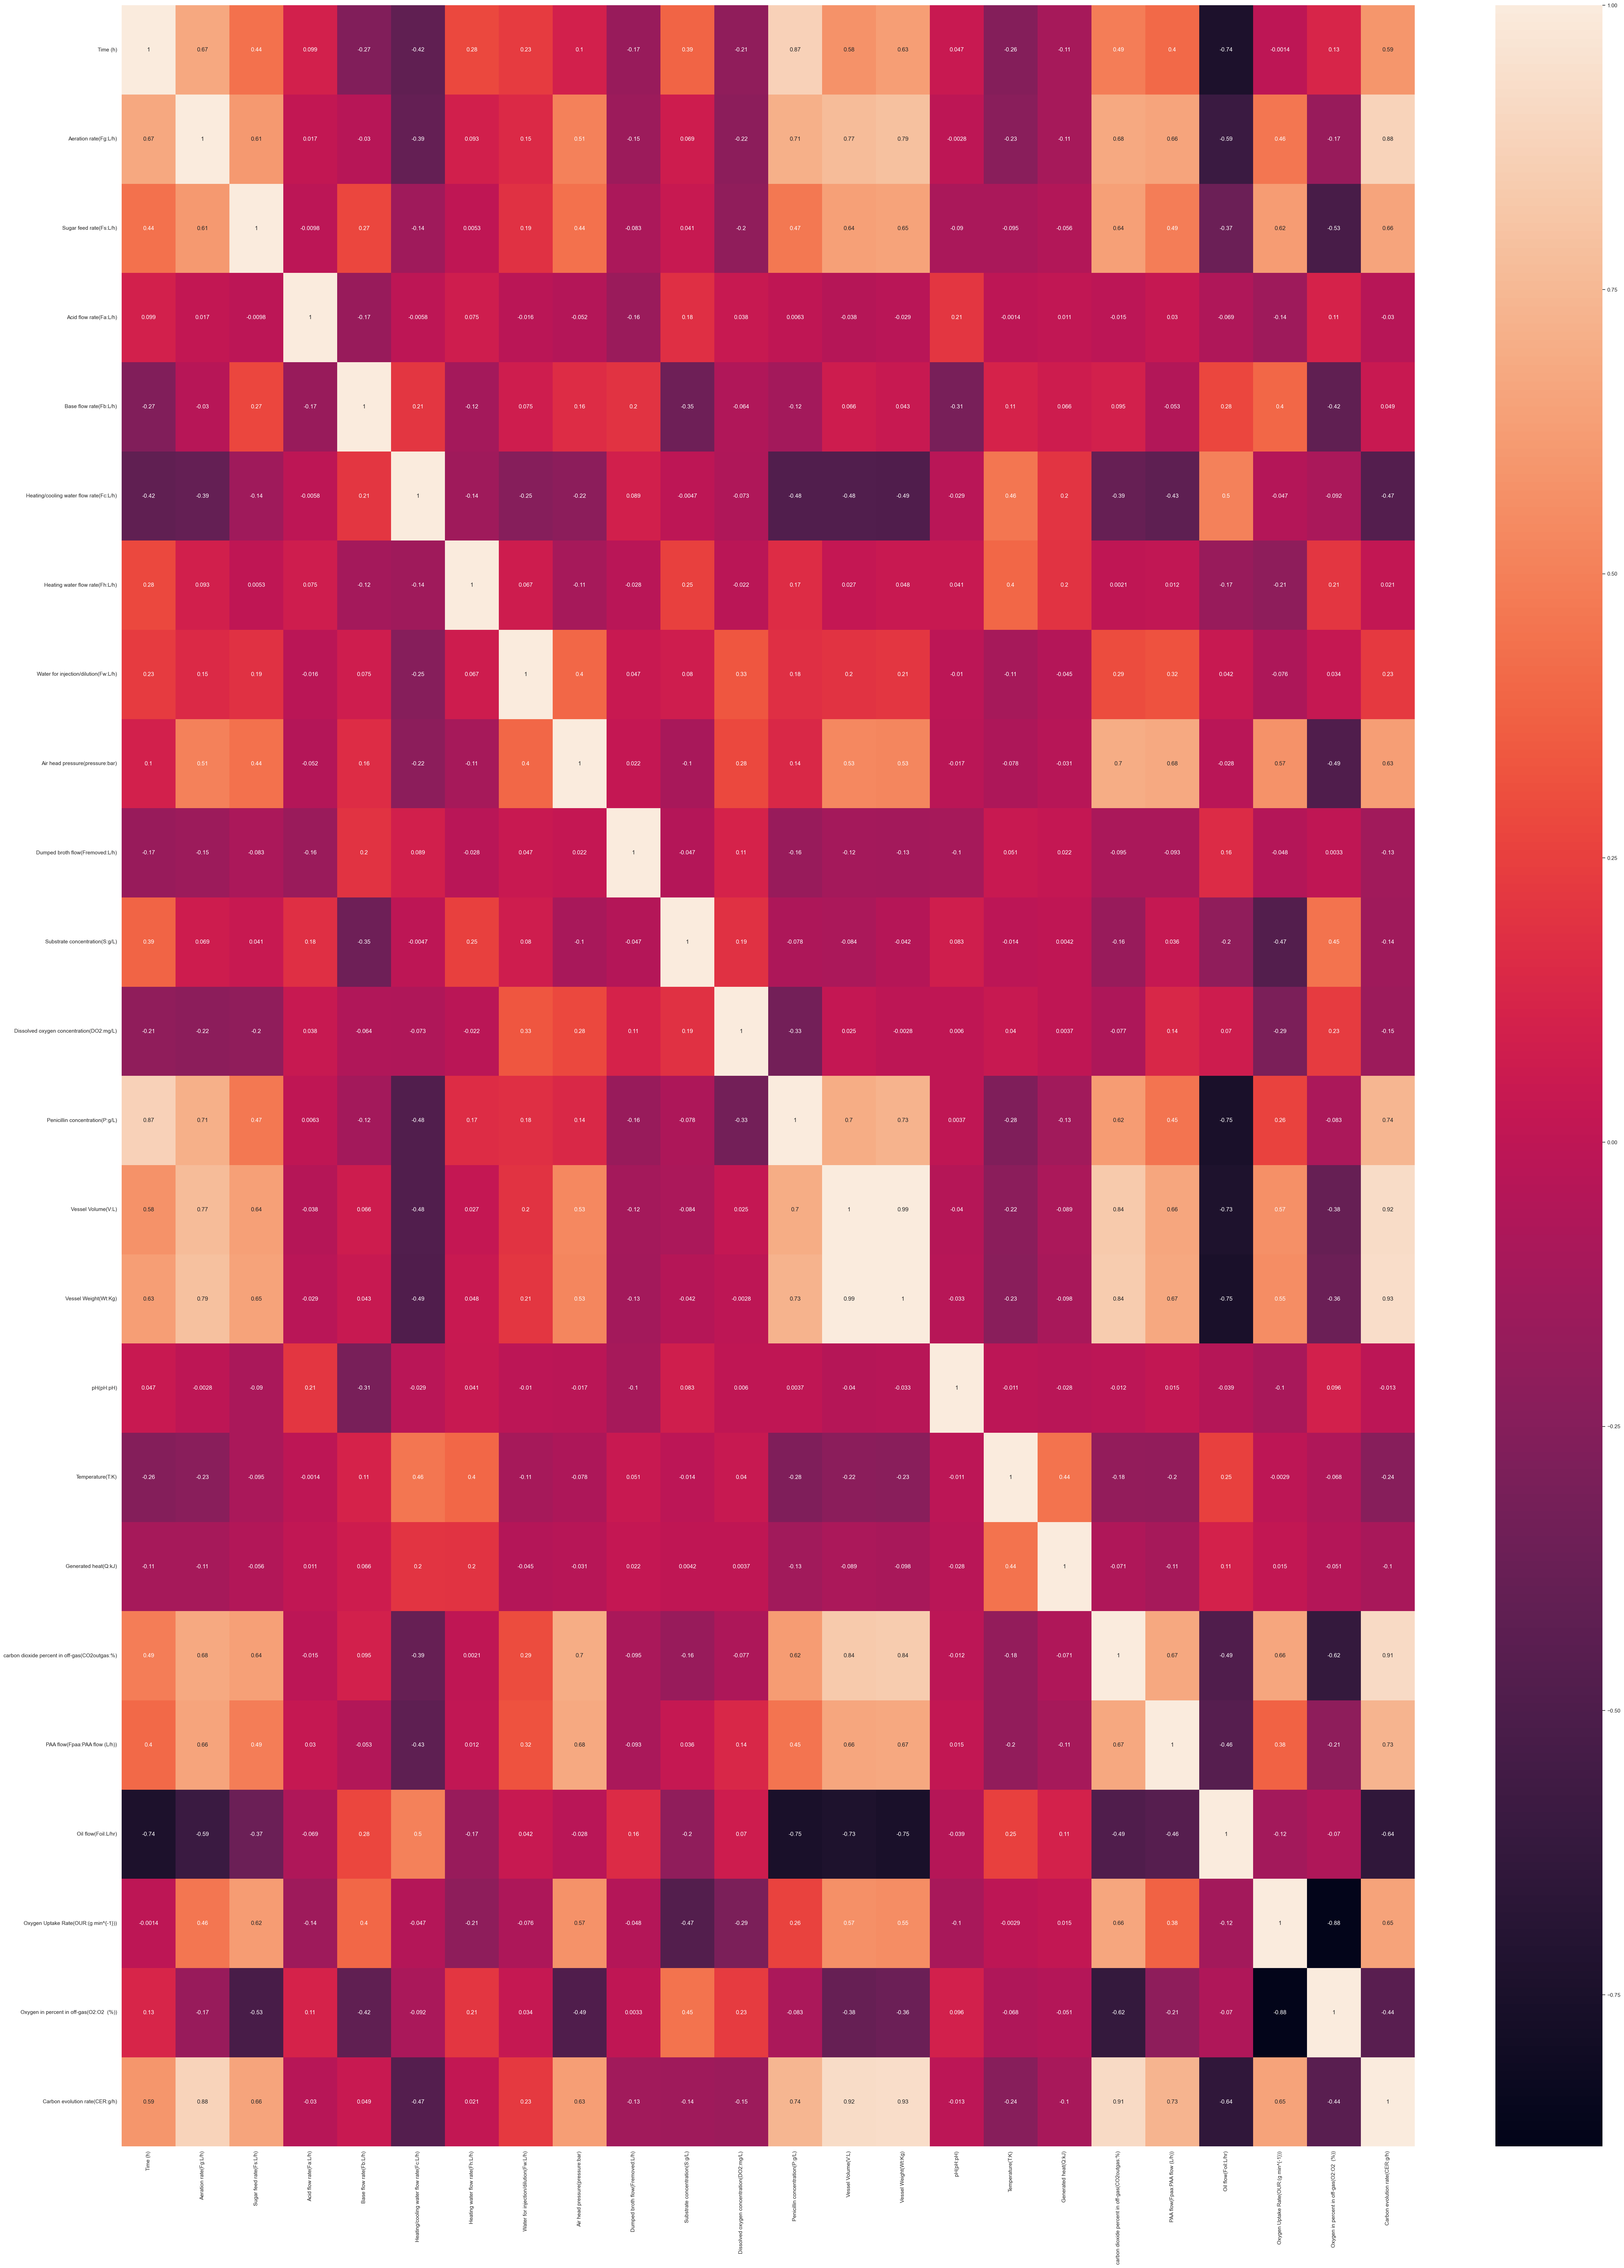

In [55]:
filtro_data = data.loc[:, ~data.columns.str.contains("offline", case=False)]
sns.set_theme(rc={'figure.figsize':(60,80)})
sns.heatmap(filtro_data.iloc[:,:-8].corr(), annot=True)
plt.show()

In [56]:
correlation_matrix = data.iloc[:, :-8].corr().abs()
high_corr_pairs = (correlation_matrix.unstack() .reset_index())
high_corr_pairs.columns = ['Variable_1', 'Variable_2', 'Correlacion']
high_corr_pairs = high_corr_pairs[(high_corr_pairs['Correlacion'] > 0.70) & (high_corr_pairs['Variable_1'] != high_corr_pairs['Variable_2'])]
high_corr_pairs = high_corr_pairs.drop_duplicates(subset=['Correlacion']).reset_index(drop=True)

print(high_corr_pairs)

                                           Variable_1  \
0                                            Time (h)   
1                                            Time (h)   
2                                            Time (h)   
3                                            Time (h)   
4                               Aeration rate(Fg:L/h)   
5                               Aeration rate(Fg:L/h)   
6                               Aeration rate(Fg:L/h)   
7                               Aeration rate(Fg:L/h)   
8                               Aeration rate(Fg:L/h)   
9                               Aeration rate(Fg:L/h)   
10                     Substrate concentration(S:g/L)   
11                     Substrate concentration(S:g/L)   
12                    Penicillin concentration(P:g/L)   
13                    Penicillin concentration(P:g/L)   
14                    Penicillin concentration(P:g/L)   
15                    Penicillin concentration(P:g/L)   
16                    Penicilli

In [57]:
correlation_matrix = filtro_data.iloc[:, :-8].corr().abs()
high_corr_pairs = (correlation_matrix.unstack() .reset_index())
high_corr_pairs.columns = ['Variable_1', 'Variable_2', 'Correlacion']
high_corr_pairs = high_corr_pairs[(high_corr_pairs['Correlacion'] > 0.70) & (high_corr_pairs['Variable_1'] != high_corr_pairs['Variable_2'])]
high_corr_pairs = high_corr_pairs.drop_duplicates(subset=['Correlacion']).reset_index(drop=True)

print(high_corr_pairs)


                                        Variable_1  \
0                                         Time (h)   
1                                         Time (h)   
2                            Aeration rate(Fg:L/h)   
3                            Aeration rate(Fg:L/h)   
4                            Aeration rate(Fg:L/h)   
5                            Aeration rate(Fg:L/h)   
6                  Penicillin concentration(P:g/L)   
7                  Penicillin concentration(P:g/L)   
8                  Penicillin concentration(P:g/L)   
9                               Vessel Volume(V:L)   
10                              Vessel Volume(V:L)   
11                              Vessel Volume(V:L)   
12                              Vessel Volume(V:L)   
13                            Vessel Weight(Wt:Kg)   
14                            Vessel Weight(Wt:Kg)   
15                            Vessel Weight(Wt:Kg)   
16  carbon dioxide percent in off-gas(CO2outgas:%)   
17                   PAA flo